In [1]:
import numpy as np

import scipy as sp

In [2]:
sp.__version__

'1.1.0'

In [3]:
# 读写wav无损音频文件
from scipy.io import wavfile

## 登月图片消噪

scipy.fftpack模块用来计算快速傅里叶变换  
速度比传统傅里叶变换更快，是对之前算法的改进  
图片是二维数据，注意使用fftpack的二维转变方法

In [4]:
# ifft2 inverse 反转
from scipy.fftpack import fft2,ifft2

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
moon.shape

(474, 630)

In [12]:
moon

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,
        0.        ],
       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.3529412 ],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

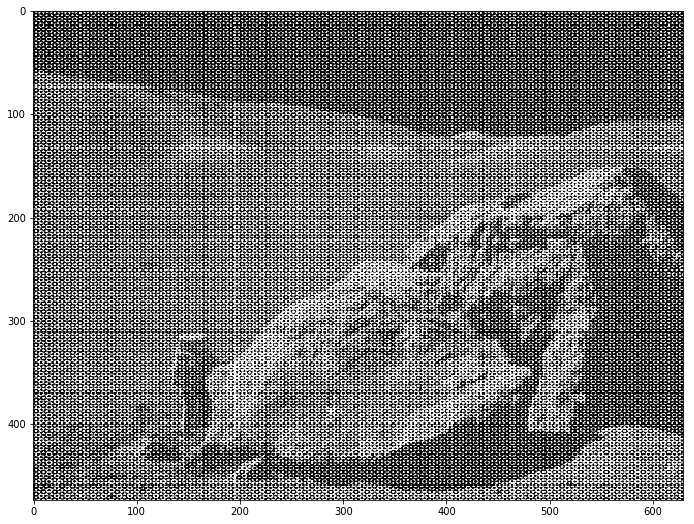

In [10]:
moon = plt.imread('./moonlanding.png')
plt.figure(figsize=(12,9))
plt.imshow(moon,cmap = plt.cm.gray)

In [13]:
moon_fft = fft2(moon)
moon_fft

array([[126598.45      +0.j       ,  -4608.5796 -1892.4688j   ,
          -322.093    -20.27744j  , ...,   -906.1585 +1539.3081j   ,
          -322.093    +20.27744j  ,  -4608.5796 +1892.4688j   ],
       [ -9421.1    +5242.1133j   ,   5224.016  -3171.7434j   ,
          1607.9927 +1269.4243j   , ...,   -677.34503 -936.16174j  ,
           354.6247 -1003.8348j   ,   1965.366  -2188.0593j   ],
       [ -2928.3513 +7280.916j    ,  -1116.4065 +1338.3179j   ,
          -474.20056 +385.40216j  , ...,    239.7723  -977.2129j   ,
          1582.9283  -261.95346j  ,   2641.927   -292.09366j  ],
       ...,
       [  1850.5718 -2451.1787j   ,   -781.0807   +13.744501j ,
           377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621j   ,
         -2705.5718 -3488.529j    ,   1897.404  -2281.9092j   ],
       [ -2928.3513 -7280.916j    ,   2641.927   +292.09366j  ,
          1582.9283  +261.95346j  , ...,  -2208.4302   +81.807434j ,
          -474.20056 -385.40216j  ,  -1116.4065 -1338.3179j   ]

In [15]:
# 计算所有数据波动频率平均值
np.abs(moon_fft).mean()

51.193375

In [16]:
# 大于10倍平均值波动，波动比较大，过滤掉
# 500
cond = np.abs(moon_fft) > 500
cond

array([[ True,  True, False, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [17]:
# 过滤重新复制，变成常量0
moon_fft[cond] = 0

In [20]:
# 将频域--------->时域（肉眼可见的图片）
moon_result = ifft2(moon_fft)
moon_result

array([[-0.2158841 -2.1086850e-18j,  0.08547963-4.8682289e-17j,
        -0.17341562+1.2980935e-17j, ...,  0.00313992-7.3380489e-17j,
        -0.1262884 +2.1906762e-17j, -0.12006474-2.9579767e-17j],
       [-0.07464715-5.9313739e-18j,  0.02630262-2.6135415e-17j,
        -0.05795981+1.3932330e-17j, ..., -0.10645279+2.1719028e-17j,
        -0.10607974+4.7120357e-17j, -0.06213436+1.2492355e-17j],
       [ 0.01300102+6.5576129e-18j, -0.04392404+3.0703507e-18j,
        -0.03069701-8.9022178e-18j, ..., -0.09355526+5.3146563e-17j,
        -0.09281505-6.2671136e-18j,  0.0542773 -1.0039507e-16j],
       ...,
       [ 0.00554965-1.8008872e-17j, -0.06839301-2.4120074e-17j,
        -0.11348293+2.8349035e-17j, ...,  0.05521014-1.6788135e-17j,
        -0.02254207+5.7200989e-17j,  0.17004317-1.9203628e-16j],
       [-0.0236596 +2.0952098e-17j, -0.21761242+6.2705591e-17j,
        -0.04112267+2.8428269e-17j, ..., -0.03240317+2.6833532e-17j,
        -0.03881308+4.1344251e-17j,  0.18942517-1.5533982e-16j]

In [21]:
moon2 = np.real(moon_result)
moon2.shape

(474, 630)

In [37]:
moon3 = np.abs(moon2)

In [41]:
moon4 = (moon3*255).astype(np.uint8)

In [35]:
moon3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

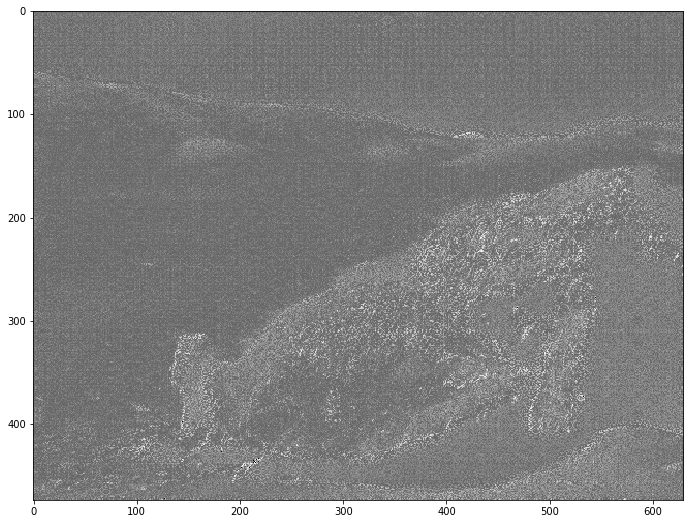

In [47]:
plt.figure(figsize=(12,9))

plt.imshow(moon4 + 100,cmap = plt.cm.gray)

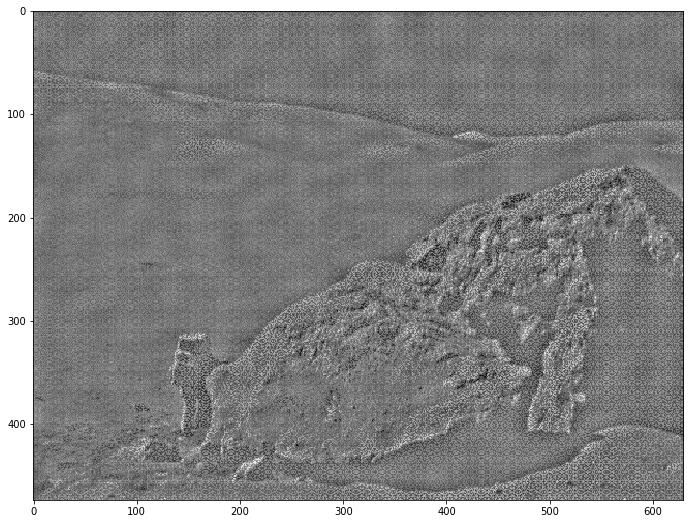

In [48]:
plt.figure(figsize=(12,9))

plt.imshow(moon2,cmap = plt.cm.gray)

### 数值积分，求解圆周率
求解圆周率  

integrate
对函数(1 - x^2)^0.5进行积分 

X**2 + Y**2 = 1,半径是1  
pi×r**2,只要求得面积--->pi

首先画一个圆

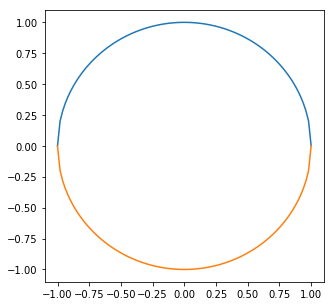

In [51]:
# X**2 + Y**2 = 1
# Y = (1 - X**2)**0.5
c = lambda x : (1-x**2)**0.5
x = np.linspace(-1,1,100)
y = c(x)
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.plot(x,-y)

In [ ]:
s = pi*r**2

pi = s/(r**2)

# r = 1

pi = s

# 半圆


圆的面积是？

使用scipy.integrate进行积分，调用quad()方法

In [52]:
from scipy import integrate

In [53]:
# 半圆面积，圆周率一半
integrate.quad(c,-1,1)

(1.5707963267948986, 1.0002356720661965e-09)

In [54]:
1.5707963267948986*2

3.141592653589797

### Scipy文件输入/输出


随机生成数组，使用scipy中的io.savemat()保存  
文件格式是.mat，标准的二进制文件

In [55]:
from scipy import io

使用io.loadmat()读取数据

In [56]:
moon2

array([[-0.2158841 ,  0.08547963, -0.17341562, ...,  0.00313992,
        -0.1262884 , -0.12006474],
       [-0.07464715,  0.02630262, -0.05795981, ..., -0.10645279,
        -0.10607974, -0.06213436],
       [ 0.01300102, -0.04392404, -0.03069701, ..., -0.09355526,
        -0.09281505,  0.0542773 ],
       ...,
       [ 0.00554965, -0.06839301, -0.11348293, ...,  0.05521014,
        -0.02254207,  0.17004317],
       [-0.0236596 , -0.21761242, -0.04112267, ..., -0.03240317,
        -0.03881308,  0.18942517],
       [-0.06233123,  0.06238206, -0.05904231, ..., -0.05108529,
        -0.01733968, -0.04830741]], dtype=float32)

In [57]:
io.savemat('moon.mat',mdict = {'moon':moon2})

In [58]:
io.loadmat('./moon.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Apr 15 10:45:32 2019',
 '__version__': '1.0',
 '__globals__': [],
 'moon': array([[-0.2158841 ,  0.08547963, -0.17341562, ...,  0.00313992,
         -0.1262884 , -0.12006474],
        [-0.07464715,  0.02630262, -0.05795981, ..., -0.10645279,
         -0.10607974, -0.06213436],
        [ 0.01300102, -0.04392404, -0.03069701, ..., -0.09355526,
         -0.09281505,  0.0542773 ],
        ...,
        [ 0.00554965, -0.06839301, -0.11348293, ...,  0.05521014,
         -0.02254207,  0.17004317],
        [-0.0236596 , -0.21761242, -0.04112267, ..., -0.03240317,
         -0.03881308,  0.18942517],
        [-0.06233123,  0.06238206, -0.05904231, ..., -0.05108529,
         -0.01733968, -0.04830741]], dtype=float32)}

读写图片使用scipy中misc.imread()/imsave()

In [59]:
from scipy import misc

In [60]:
cat = misc.imread('./cat.jpg')
cat

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


array([[[231, 186, 131],
        [232, 187, 132],
        [233, 188, 133],
        ...,
        [100,  54,  54],
        [ 92,  48,  47],
        [ 85,  43,  44]],

       [[232, 187, 132],
        [232, 187, 132],
        [233, 188, 133],
        ...,
        [100,  54,  54],
        [ 92,  48,  47],
        [ 84,  42,  43]],

       [[232, 187, 132],
        [233, 188, 133],
        [233, 188, 133],
        ...,
        [ 99,  53,  53],
        [ 91,  47,  46],
        [ 83,  41,  42]],

       ...,

       [[199, 119,  82],
        [199, 119,  82],
        [200, 120,  83],
        ...,
        [189,  99,  65],
        [187,  97,  63],
        [187,  97,  63]],

       [[199, 119,  82],
        [199, 119,  82],
        [199, 119,  82],
        ...,
        [188,  98,  64],
        [186,  96,  62],
        [188,  95,  62]],

       [[199, 119,  82],
        [199, 119,  82],
        [199, 119,  82],
        ...,
        [188,  98,  64],
        [188,  95,  62],
        [188,  95,  62]]

In [62]:
misc.imshow(cat)

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.
  """Entry point for launching an IPython kernel.


RuntimeError: Could not execute image viewer.

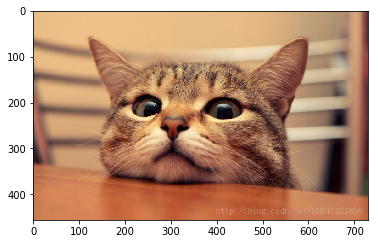

In [63]:
plt.imshow(cat)

misc旋转、resize、imfilter

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.
  """Entry point for launching an IPython kernel.


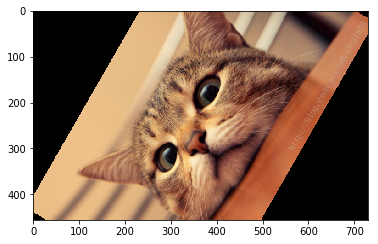

In [64]:
cat2 = misc.imrotate(cat,60)
plt.imshow(cat2)

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


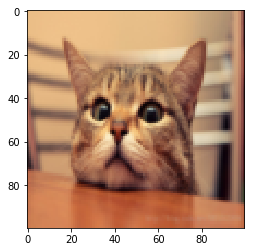

In [68]:
'''  size : int, float or tuple
        * int   - Percentage of current size.
        * float - Fraction of current size.
        * tuple - Size of the output image (height, width).'''
cat3 = misc.imresize(cat,(100,100))
plt.imshow(cat3)

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imfilter` is deprecated!
`imfilter` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow filtering functionality directly.
  


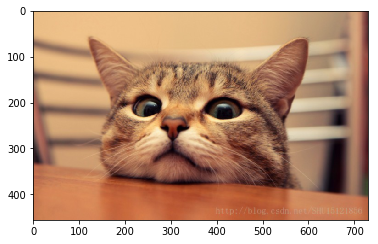

In [73]:
# 滤波操作
'''    ftype : str
        The filter that has to be applied. Legal values are:
        'blur', 'contour', 'detail', 'edge_enhance', 'edge_enhance_more',
        'emboss', 'find_edges', 'smooth', 'smooth_more', 'sharpen'.'''
cat4 = misc.imfilter(cat,'smooth')
plt.imshow(cat4)

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imfilter` is deprecated!
`imfilter` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow filtering functionality directly.
  """Entry point for launching an IPython kernel.


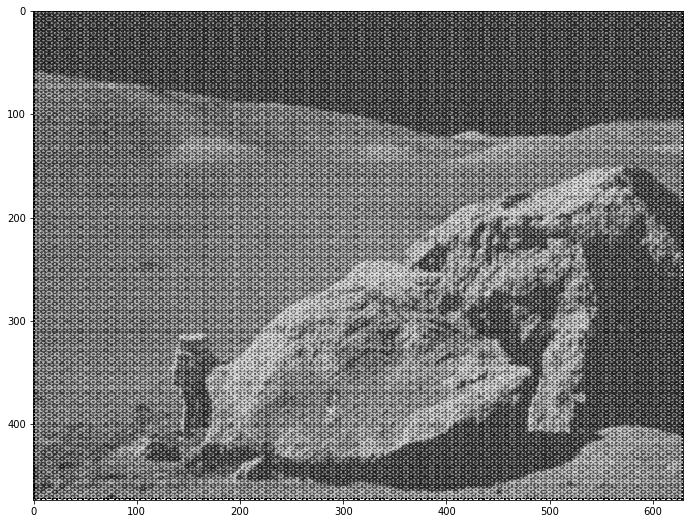

In [76]:
moon5 = misc.imfilter(moon,'smooth_more')
plt.figure(figsize=(12,9))
plt.imshow(moon5,cmap = plt.cm.gray)

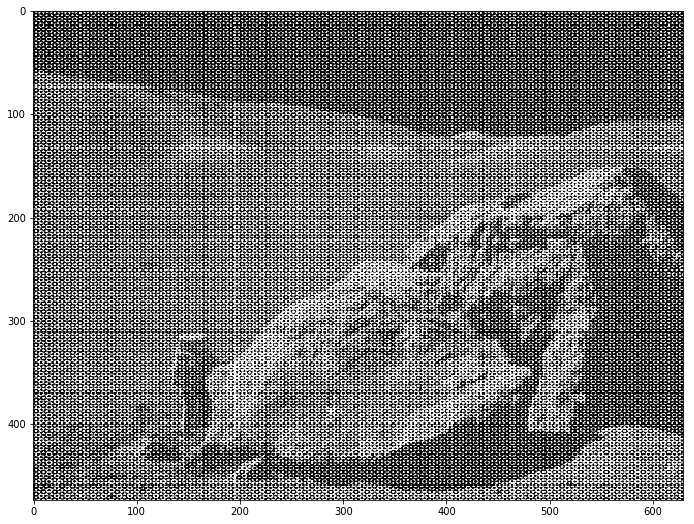

In [75]:
plt.figure(figsize=(12,9))
plt.imshow(moon,cmap = plt.cm.gray)

### 图片处理

使用scipy.misc.face(gray=True)获取图片，使用ndimage移动坐标、旋转图片、切割图片、缩放图片

导包，读取图片显示图片

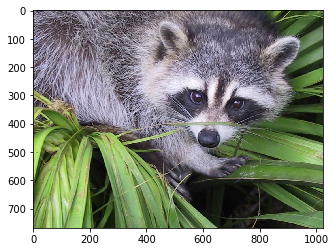

In [78]:
# scipy自带的一张图片，练习
# 使用任何图片都可以
face = misc.face()
plt.imshow(face)

In [77]:
from scipy import ndimage

shift移动坐标

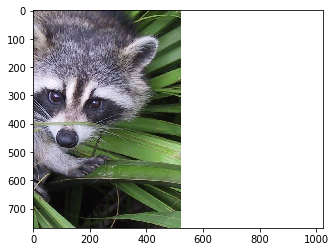

In [81]:
# 0 纯黑，255纯白
face2 = ndimage.shift(face,shift = [0,-500,0],cval = 255)
plt.imshow(face2)

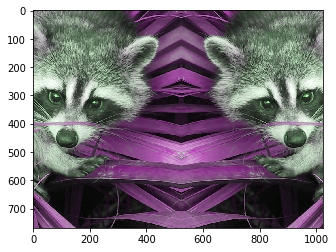

In [88]:
'''mode : {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}, optional
    The `mode` parameter determines how the input array is extended
    when the filter overlaps a border. Default is 'reflect'. Behavior
    for each valid value is as follows:

    'reflect' (`d c b a | a b c d | d c b a`)
        The input is extended by reflecting about the edge of the last
        pixel.

    'constant' (`k k k k | a b c d | k k k k`)
        The input is extended by filling all values beyond the edge with
        the same constant value, defined by the `cval` parameter.

    'nearest' (`a a a a | a b c d | d d d d`)
        The input is extended by replicating the last pixel.

    'mirror' (`d c b | a b c d | c b a`)
        The input is extended by reflecting about the center of the last
        pixel.

    'wrap' (`a b c d | a b c d | a b c d`)
        The input is extended by wrapping around to the opposite edge.'''
face2 = ndimage.shift(face,shift = [0,-500,3],mode = 'mirror')
plt.imshow(face2)

rotate旋转图片

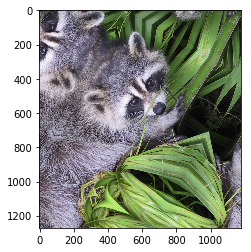

In [90]:
face3 = ndimage.rotate(face,angle = 60,mode = 'mirror')
plt.imshow(face3)

zoom缩放图片

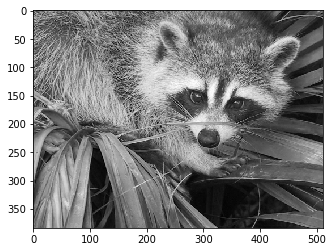

In [100]:
face4 = ndimage.zoom(face,zoom = [0.5,0.5,1/3],mode = 'mirror')
plt.imshow(face4.reshape(384,512),cmap = plt.cm.gray)

In [103]:
face4.shape

(384, 512, 4)

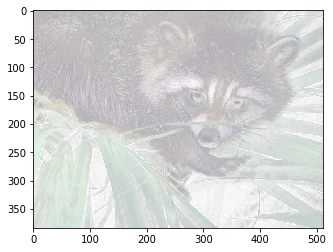

In [102]:
face4 = ndimage.zoom(face,zoom = [0.5,0.5,4/3],mode = 'mirror')
plt.imshow(face4,cmap = plt.cm.gray)

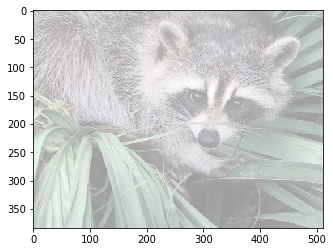

In [107]:
face4[:,:,3] = 100
plt.imshow(face4)

In [98]:
face4.shape

(384, 512, 1)

切割图片

图片进行过滤   
添加噪声，对噪声图片使用ndimage中的高斯滤波、中值滤波、signal中维纳滤波进行处理  
使图片变清楚

加载图片，使用灰色图片misc.face()添加噪声

In [ ]:
ndimage

高斯滤波sigma：高斯核的标准偏差

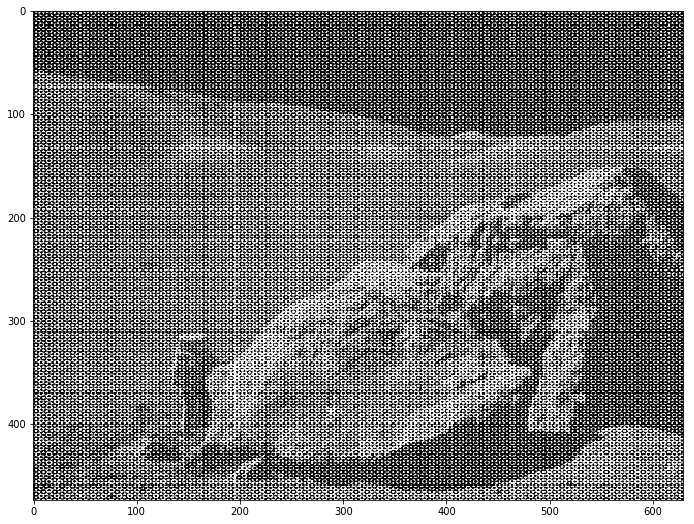

In [108]:
plt.figure(figsize=(12,9))
plt.imshow(moon,cmap = plt.cm.gray)

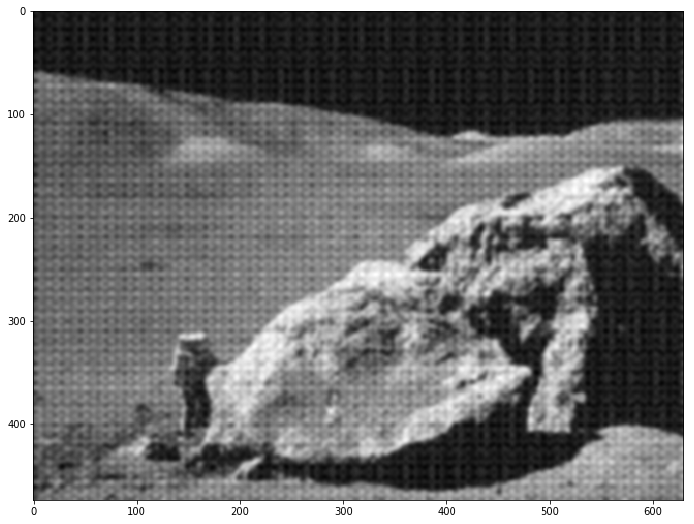

In [112]:
# 高斯分布，正太分布，概率不一样
# misc.imfilter(moon,'smooth')
moon5 = ndimage.gaussian_filter(moon,sigma = 2)
plt.figure(figsize=(12,9))
plt.imshow(moon5,cmap = plt.cm.gray)

中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入

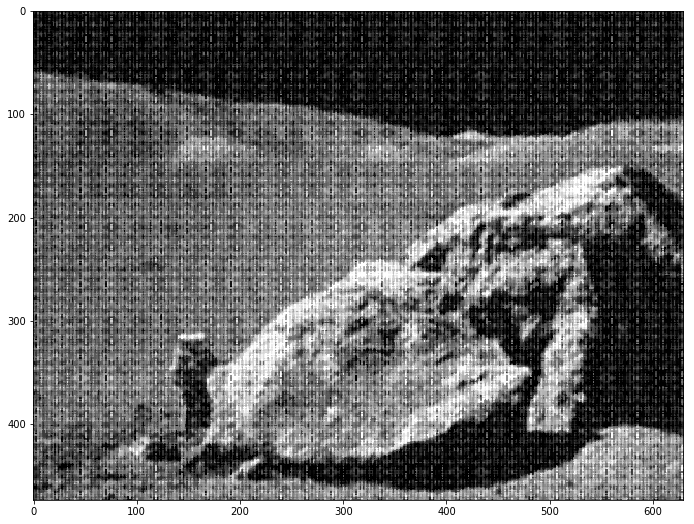

In [117]:
moon6 = ndimage.median_filter(moon,size=5)
plt.figure(figsize=(12,9))
plt.imshow(moon6,cmap = plt.cm.gray)

signal维纳滤波mysize：滤镜尺寸的标量

In [118]:
from scipy import matrix

In [119]:
A = matrix(np.random.randint(0,10,size = (4,5)))
A

matrix([[5, 8, 8, 4, 6],
        [3, 7, 5, 9, 5],
        [1, 2, 1, 4, 0],
        [8, 8, 1, 3, 7]])

In [120]:
B = matrix(np.random.randint(0,10,size= (5,4)))
B

matrix([[3, 6, 5, 5],
        [3, 0, 6, 2],
        [5, 7, 2, 0],
        [4, 8, 4, 0],
        [3, 5, 8, 9]])

In [121]:
A.dot(B)

matrix([[113, 148, 153,  95],
        [106, 150, 143,  74],
        [ 30,  45,  35,   9],
        [ 86, 114, 158, 119]])

In [122]:
S = np.random.randint(0,100,size = (10000,10000))
S

array([[17, 18, 48, ...,  1,  3, 69],
       [21, 13, 14, ..., 77, 26, 98],
       [14, 17,  1, ...,  1, 59, 84],
       ...,
       [37, 88, 69, ..., 89,  0, 41],
       [64, 92, 93, ..., 20, 33,  0],
       [23, 61,  6, ...,  6, 29, 44]])

In [124]:
S.dtype

dtype('int32')

In [125]:
10000*10000*32/8/1024/1024

381.4697265625

In [123]:
np.save('./S.npy',S)

In [126]:
S[S < 98] = 0

In [127]:
# dense 稠密 
S

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, 98],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [136]:
S[0][:100]

array([ 0,  0,  0, 99,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 98,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 99,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [128]:
np.save('S2.npy',S)

In [129]:
# 稀松矩阵，大部分是0，小部分是非零数据
from scipy import sparse

In [130]:
S1 = sparse.csc_matrix(S)
S1

<10000x10000 sparse matrix of type '<class 'numpy.int32'>'
	with 2002372 stored elements in Compressed Sparse Column format>

In [131]:
print(S1)

  (5, 0)	98
  (25, 0)	99
  (27, 0)	98
  (60, 0)	98
  (169, 0)	98
  (175, 0)	98
  (178, 0)	98
  (213, 0)	99
  (318, 0)	99
  (387, 0)	99
  (455, 0)	99
  (500, 0)	99
  (537, 0)	98
  (556, 0)	99
  (638, 0)	98
  (683, 0)	99
  (736, 0)	98
  (778, 0)	98
  (893, 0)	99
  (919, 0)	99
  (935, 0)	99
  (950, 0)	99
  (1013, 0)	99
  (1094, 0)	98
  (1143, 0)	99
  :	:
  (8758, 9999)	98
  (8795, 9999)	99
  (8830, 9999)	99
  (8892, 9999)	99
  (8945, 9999)	98
  (8963, 9999)	98
  (8987, 9999)	99
  (9016, 9999)	98
  (9070, 9999)	98
  (9240, 9999)	98
  (9358, 9999)	98
  (9419, 9999)	99
  (9430, 9999)	98
  (9468, 9999)	98
  (9563, 9999)	99
  (9584, 9999)	98
  (9631, 9999)	99
  (9639, 9999)	98
  (9685, 9999)	98
  (9701, 9999)	98
  (9848, 9999)	99
  (9874, 9999)	99
  (9928, 9999)	98
  (9961, 9999)	98
  (9963, 9999)	99


In [132]:
sparse.save_npz('./sparse.npz',S1)

In [133]:
S2 = sparse.csr_matrix(S)
S2

<10000x10000 sparse matrix of type '<class 'numpy.int32'>'
	with 2002372 stored elements in Compressed Sparse Row format>

In [134]:
print(S2)

  (0, 3)	99
  (0, 46)	98
  (0, 76)	99
  (0, 131)	98
  (0, 189)	98
  (0, 208)	99
  (0, 245)	98
  (0, 362)	98
  (0, 442)	98
  (0, 474)	99
  (0, 529)	99
  (0, 570)	98
  (0, 652)	99
  (0, 686)	99
  (0, 714)	99
  (0, 757)	98
  (0, 811)	98
  (0, 812)	98
  (0, 877)	99
  (0, 923)	98
  (0, 977)	98
  (0, 981)	99
  (0, 989)	99
  (0, 1037)	98
  (0, 1103)	99
  :	:
  (9999, 8678)	98
  (9999, 8829)	98
  (9999, 8861)	99
  (9999, 8862)	99
  (9999, 8927)	98
  (9999, 8939)	99
  (9999, 9068)	99
  (9999, 9139)	98
  (9999, 9153)	98
  (9999, 9160)	98
  (9999, 9200)	99
  (9999, 9222)	98
  (9999, 9292)	99
  (9999, 9299)	99
  (9999, 9316)	98
  (9999, 9323)	98
  (9999, 9403)	99
  (9999, 9569)	99
  (9999, 9594)	98
  (9999, 9673)	99
  (9999, 9687)	99
  (9999, 9690)	99
  (9999, 9837)	99
  (9999, 9925)	99
  (9999, 9950)	99


In [138]:
S[0,189]

98

In [139]:
from scipy import constants

In [140]:
constants.pi

3.141592653589793

In [142]:
constants.Planck

6.62607004e-34